Q: As you saw in the chapter “Deep learning for computer vision,” convents can be used
successfully to classify images. Specifically, consider the Cats & Dogs example. There were two
broad approaches to classifying Cats & Dogs using convnets: Training a network from scratch,
versus using a pretrained convnet. While small datasets can lead to overfitting, thus making
training a network for prediction more difficult, you also saw several techniques to reduce
overfitting, and these include data augmentation and regularization. Examine the relationship between training samples and the choice
of training your model from scratch, versus using a pretrained convnet.

Uploading the given file

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import os, shutil, pathlib

image_path = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

Mounted at /content/drive


Q1. Training sample of 1000, a validation sample of 500, and a test sample of 500

Base Model

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

x_base_input = keras.Input(shape=(180, 180, 3))
x_base_rescale = layers.Rescaling(1./255)(x_base_input)
x_base_conv1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x_base_rescale)
x_base_pool1 = layers.MaxPooling2D(pool_size=2)(x_base_conv1)
x_base_conv2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x_base_pool1)
x_base_pool2 = layers.MaxPooling2D(pool_size=2)(x_base_conv2)
x_base_conv3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x_base_pool2)
x_base_pool3 = layers.MaxPooling2D(pool_size=2)(x_base_conv3)
x_base_conv4 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_base_pool3)
x_base_pool4 = layers.MaxPooling2D(pool_size=2)(x_base_conv4)
x_base_conv5 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_base_pool4)
x_base_flatten = layers.Flatten()(x_base_conv5)
x_base_output = layers.Dense(1, activation="sigmoid")(x_base_flatten)

base_model = keras.Model(inputs=x_base_input, outputs=x_base_output)
model_base_2= keras.Model(inputs=x_base_input, outputs=x_base_output)
model_base_500 = keras.Model(inputs=x_base_input, outputs=x_base_output)

L2 Model

In [7]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

x_L2_input = keras.Input(shape=(180, 180, 3))
x_L2_rescale = layers.Rescaling(1./255)(x_L2_input)
x_L2_conv1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(x_L2_rescale)
x_L2_pool1 = layers.MaxPooling2D(pool_size=2)(x_L2_conv1)
x_L2_conv2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(x_L2_pool1)
x_L2_pool2 = layers.MaxPooling2D(pool_size=2)(x_L2_conv2)
x_L2_conv3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(x_L2_pool2)
x_L2_pool3 = layers.MaxPooling2D(pool_size=2)(x_L2_conv3)
x_L2_conv4 = layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(x_L2_pool3)
x_L2_pool4 = layers.MaxPooling2D(pool_size=2)(x_L2_conv4)
x_L2_conv5 = layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(x_L2_pool4)
x_L2_flatten = layers.Flatten()(x_L2_conv5)
x_L2_output = layers.Dense(1, activation="sigmoid")(x_L2_flatten)

L2_model = keras.Model(inputs=x_L2_input, outputs=x_L2_output)

Dropout Model

In [8]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

x_d_input = keras.Input(shape=(180, 180, 3))
x_d_rescale = layers.Rescaling(1./255)(x_d_input)
x_d_conv1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x_d_rescale)
x_d_pool1 = layers.MaxPooling2D(pool_size=2)(x_d_conv1)
x_d_conv2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x_d_pool1)
x_d_pool2 = layers.MaxPooling2D(pool_size=2)(x_d_conv2)
x_d_conv3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x_d_pool2)
x_d_pool3 = layers.MaxPooling2D(pool_size=2)(x_d_conv3)
x_d_conv4 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_d_pool3)
x_d_pool4 = layers.MaxPooling2D(pool_size=2)(x_d_conv4)
x_d_conv5 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_d_pool4)
x_d_pool5 = layers.Flatten()(x_d_conv5)
x_d_dropout = layers.Dropout(0.5)(x_d_pool5)
x_d_output = layers.Dense(1, activation="sigmoid")(x_d_dropout)

drop_model = keras.Model(inputs=x_d_input, outputs=x_d_output)
drop_model_3 = keras.Model(inputs=x_d_input, outputs=x_d_output)

In [9]:
base_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
L2_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
drop_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Configuring the models for training

In [12]:
base_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [13]:
drop_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [14]:
L2_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [15]:
model_base_2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [16]:
drop_model_3.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [17]:
model_base_500.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [18]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

seed = 42
tf.random.set_seed(seed)

train_full_dataset = image_dataset_from_directory(
    image_path / "train",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=seed
)

validation_full_dataset = image_dataset_from_directory(
    image_path / "validation",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=seed
)

test_full_dataset = image_dataset_from_directory(
    image_path / "test",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=seed
)

# Creating similar smaller datasets
train_dataset = train_full_dataset.take(1000)
train_dataset_1500 = train_full_dataset.take(1500)
train_dataset_500 = train_full_dataset.take(500)
train_dataset_2000 = train_dataset.shuffle(buffer_size=2000)
validation_dataset = validation_full_dataset.take(500)
validation_dataset_1000 = validation_full_dataset.take(1000)
test_dataset = test_full_dataset.take(500)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [19]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [20]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [21]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [22]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [23]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Model fitting to the given dataset.

In [24]:
# Saving the best model and preventing overfitting. (Defining the call backs)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]

In [25]:
history_base = base_model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 634s 10s/step - accuracy: 0.5039 - loss: 0.7293 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.5245 - loss: 0.6931 - val_accuracy: 0.5020 - val_loss: 0.7263
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.5594 - loss: 0.6869 - val_accuracy: 0.5400 - val_loss: 0.7331
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.6055 - loss: 0.6653 - val_accuracy: 0.6140 - val_loss: 0.6487
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.6343 - loss: 0.6377 - val_accuracy: 0.6630 - val_loss: 0.6129
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.6927 - loss: 0.5933 - val_accuracy: 0.6830 - val_loss: 0.6096
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.7218 - loss: 0.5550 - val_accuracy: 0.7420 - val_loss: 0.5623
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.7269 - loss: 0.5140 - val_accuracy: 0.6540 - 

In [26]:
history_base = model_base_500.fit(
    train_dataset_500,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.7172 - loss: 0.5489 - val_accuracy: 0.6740 - val_loss: 0.6192
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.7842 - loss: 0.4560 - val_accuracy: 0.6820 - val_loss: 0.6160
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.8067 - loss: 0.4136 - val_accuracy: 0.7240 - val_loss: 0.6039
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.8635 - loss: 0.3419 - val_accuracy: 0.7320 - val_loss: 0.6502
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.8901 - loss: 0.2701 - val_accuracy: 0.7300 - val_loss: 0.7947
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.9045 - loss: 0.2309 - val_accuracy: 0.7220 - val_loss: 0.8701
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.9340 - loss: 0.1732 - val_accuracy: 0.6900 - val_loss: 1.1196
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9521 - loss: 0.1419 - val_accuracy: 0.7470 - v

In [27]:
history_base_1500 = model_base_2.fit(
    train_dataset_1500,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.8155 - loss: 0.4520 - val_accuracy: 0.6930 - val_loss: 0.7638
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.8866 - loss: 0.2927 - val_accuracy: 0.6990 - val_loss: 0.8749
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9120 - loss: 0.2229 - val_accuracy: 0.7360 - val_loss: 0.7155
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.9375 - loss: 0.1631 - val_accuracy: 0.7410 - val_loss: 0.8745
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.9579 - loss: 0.1164 - val_accuracy: 0.7480 - val_loss: 1.0884
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.9711 - loss: 0.0791 - val_accuracy: 0.7180 - val_loss: 1.2177
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9655 - loss: 0.0897 - val_accuracy: 0.7440 - val_loss: 1.4302
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.9786 - loss: 0.0630 - val_accuracy: 0.7310 - v

In [28]:
history_d_2000 = drop_model_3.fit(
    train_dataset_2000,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.4794 - loss: 0.7156 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.5054 - loss: 0.6943 - val_accuracy: 0.4990 - val_loss: 0.7072
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.5364 - loss: 0.6952 - val_accuracy: 0.6380 - val_loss: 0.6747
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.5892 - loss: 0.6734 - val_accuracy: 0.5250 - val_loss: 0.6929
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.6219 - loss: 0.6434 - val_accuracy: 0.6020 - val_loss: 0.6550
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.6745 - loss: 0.6157 - val_accuracy: 0.6940 - val_loss: 0.5942
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.7053 - loss: 0.5687 - val_accuracy: 0.6980 - val_loss: 0.5829
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.7210 - loss: 0.5536 - val_accuracy: 0.6890 - v

In [29]:

history_d = drop_model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.7280 - loss: 0.5476 - val_accuracy: 0.7110 - val_loss: 0.6550
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.7833 - loss: 0.4685 - val_accuracy: 0.7240 - val_loss: 0.5798
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.8017 - loss: 0.4309 - val_accuracy: 0.7420 - val_loss: 0.5536
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.8341 - loss: 0.3970 - val_accuracy: 0.7480 - val_loss: 0.5630
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.8507 - loss: 0.3407 - val_accuracy: 0.7670 - val_loss: 0.5558
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.8661 - loss: 0.3191 - val_accuracy: 0.7490 - val_loss: 0.7129
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.8840 - loss: 0.2753 - val_accuracy: 0.7630 - val_loss: 0.6618
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.9105 - loss: 0.2617 - val_accuracy: 0.7460 - v

In [30]:
history_L2 = L2_model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.4954 - loss: 2.3939 - val_accuracy: 0.5000 - val_loss: 0.8827
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.5046 - loss: 0.8007 - val_accuracy: 0.5000 - val_loss: 0.7018
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.4850 - loss: 0.6981 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.5015 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.4836 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.4780 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.4907 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.4967 - loss: 0.6932 - val_accuracy: 0.5000 - v

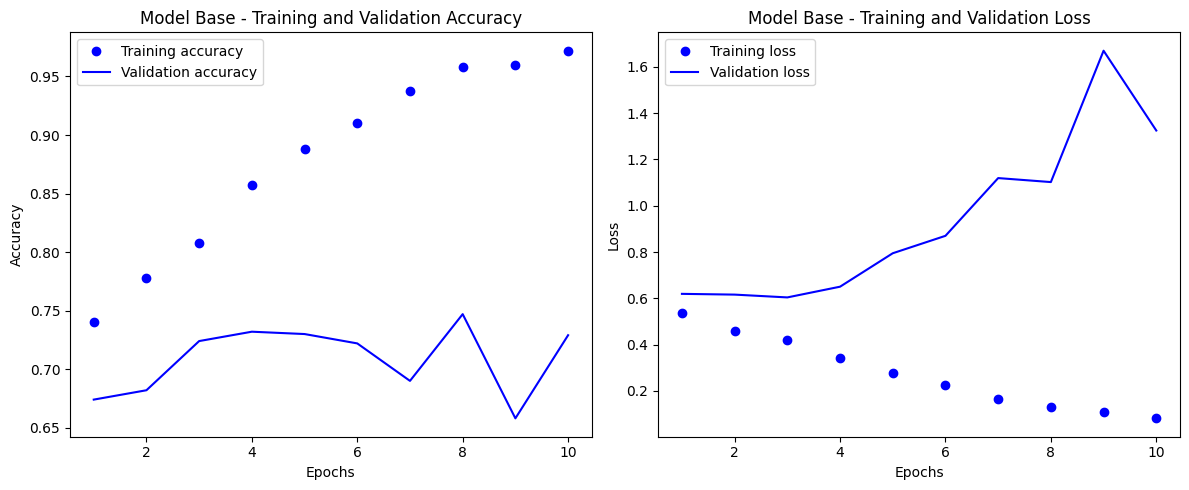

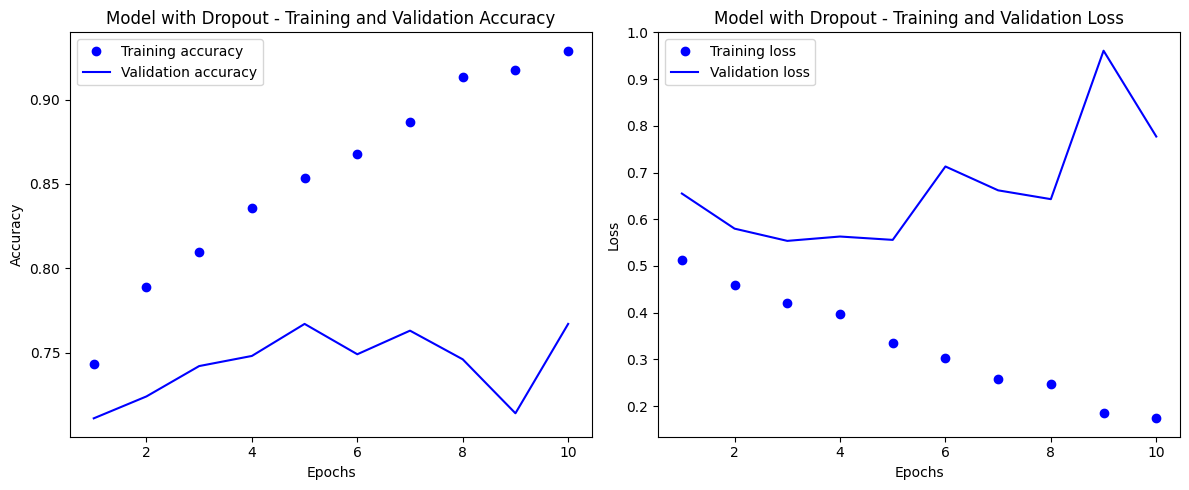

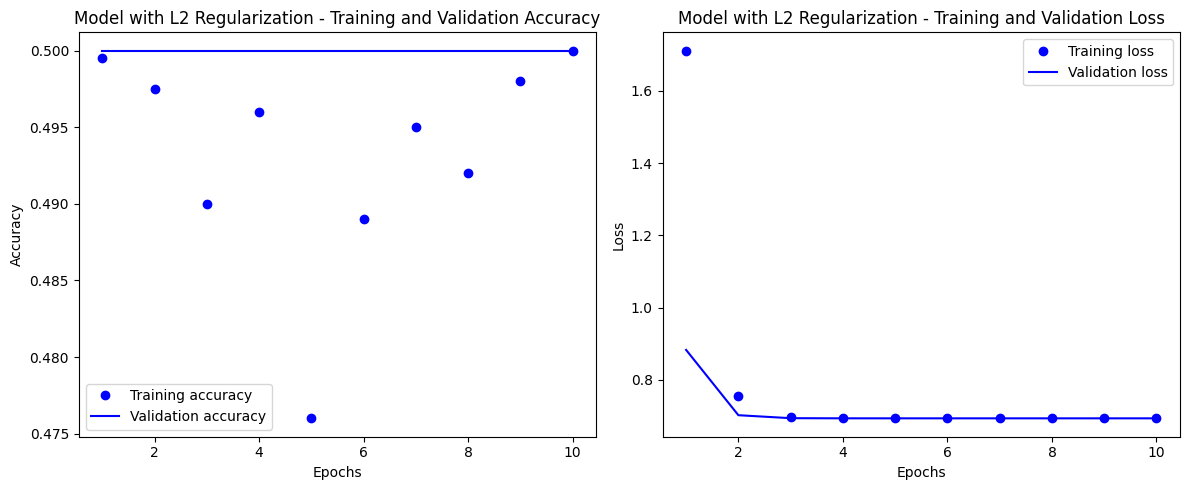

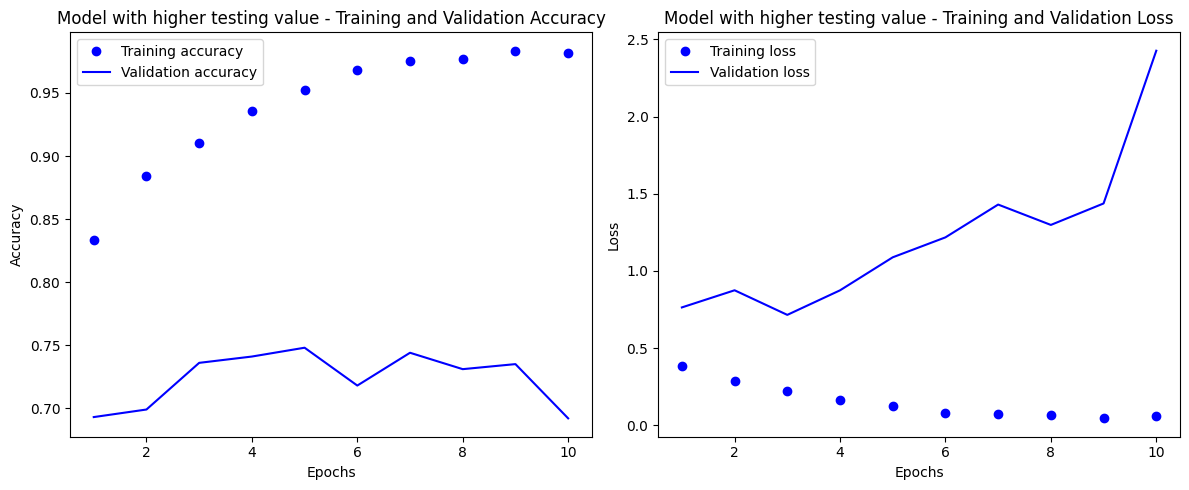

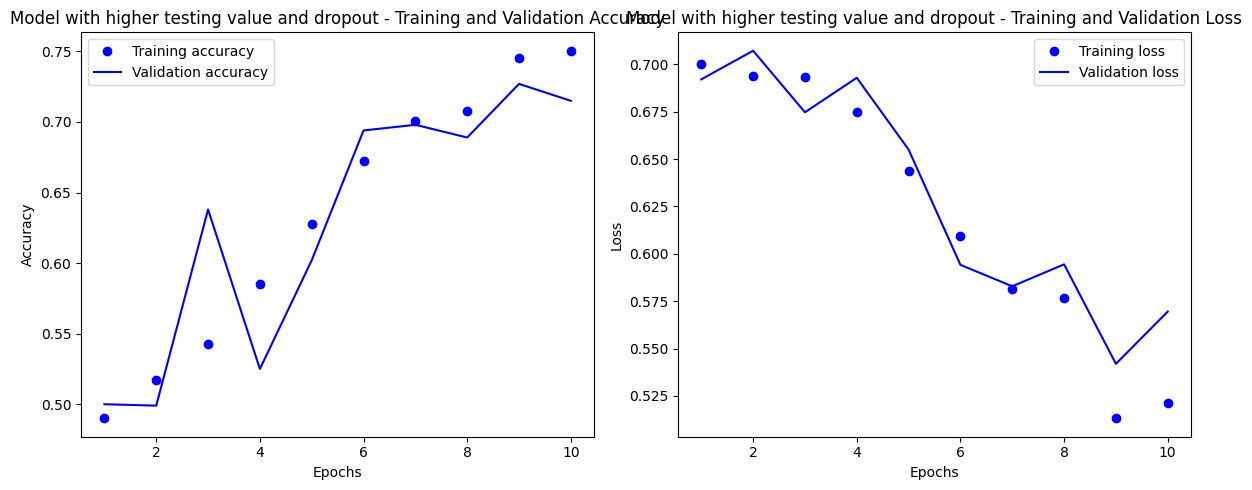

In [31]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    # Plot accuracy and loss
    plt.figure(figsize=(12, 5))  # Create a new figure for each model
    plt.subplot(1, 2, 1)  # Create a subplot for accuracy
    plt.plot(epochs, accuracy, "bo", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title(f"{model_name} - Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # loss
    plt.subplot(1, 2, 2)  # Create a subplot for loss
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title(f"{model_name} - Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Plot training results for each model
plot_training_history(history_base, "Model Base")
plot_training_history(history_d, "Model with Dropout")
plot_training_history(history_L2, "Model with L2 Regularization")
plot_training_history(history_base_2, "Model with higher testing value")
plot_training_history(history_d_3, "Model with higher testing value and dropout")

Checking the accuracy of the test set

Evaluating the models after training

In [32]:
test_loss, test_acc = base_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 304s 9s/step - accuracy: 0.7286 - loss: 0.7438
Test accuracy: 0.719


In [33]:
test_loss, test_acc = drop_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 825ms/step - accuracy: 0.7428 - loss: 0.5508
Test accuracy: 0.742


In [34]:
test_loss, test_acc = L2_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 815ms/step - accuracy: 0.5192 - loss: 0.6931
Test accuracy: 0.500


In [35]:
test_loss, test_acc = model_base_500.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 835ms/step - accuracy: 0.7143 - loss: 0.7688
Test accuracy: 0.719


In [36]:
test_loss, test_acc = model_base_2.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 774ms/step - accuracy: 0.6957 - loss: 0.8101
Test accuracy: 0.719


In [37]:
test_loss, test_acc = drop_model_3.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 784ms/step - accuracy: 0.7373 - loss: 0.5643
Test accuracy: 0.742


Q4. Pre-Trained model

In [38]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [39]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━

In [41]:
train_features.shape

(2000, 5, 5, 512)

In [42]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,  # Number of epochs to wait for improvement
        restore_best_weights=True  # Restore model weights from the epoch with the best value
    )
]
history = model.fit(
    train_features, train_labels,
    epochs=10, #based on the graph highest accuracy
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8748 - loss: 22.9065 - val_accuracy: 0.9720 - val_loss: 2.9418
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9739 - loss: 4.0921 - val_accuracy: 0.9760 - val_loss: 3.4830
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9895 - loss: 1.3792 - val_accuracy: 0.9770 - val_loss: 3.3924
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9933 - loss: 0.7809 - val_accuracy: 0.9790 - val_loss: 3.5620
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9930 - loss: 0.6163 - val_accuracy: 0.9480 - val_loss: 10.4799
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9923 - loss: 1.1447 - val_accuracy: 0.9340 - val_loss: 16.9003
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9929 - loss: 0.5664 - val_accuracy: 0.9750 - val_loss: 4.8933
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 1.0000 - loss: 2.9525e-14 - val_accuracy: 0.9

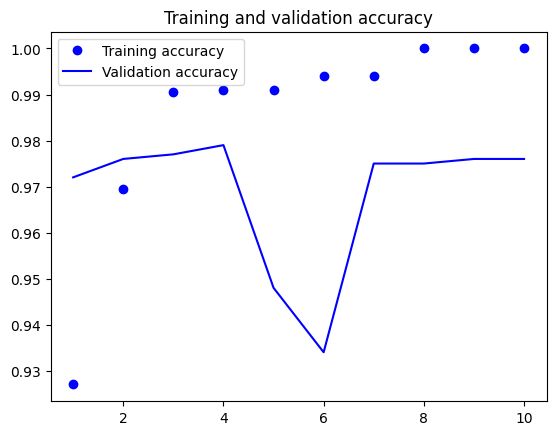

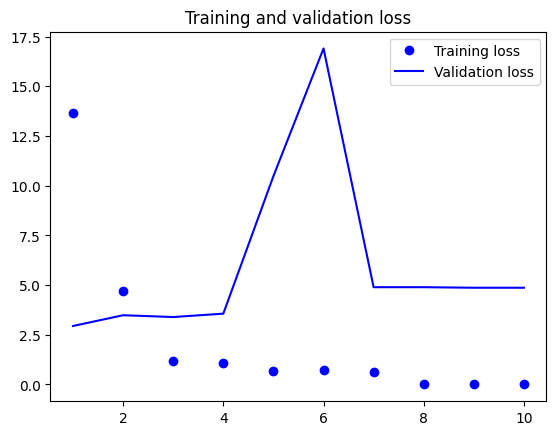

In [43]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [44]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [45]:
conv_base.trainable = True
print("Number of trainable weights "
      "before freezing:", len(conv_base.trainable_weights))

Number of trainable weights before freezing: 26


In [46]:
conv_base.trainable = False
print("Number of trainable weights "
      "after freezing:", len(conv_base.trainable_weights))

Number of trainable weights after freezing: 0


In [47]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [48]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [49]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [50]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=8,  # Number of epochs to wait for improvement
        restore_best_weights=True  # Restore model weights from the epoch with the best value
    )
]
history = model.fit(
    train_dataset,
    epochs=8, # best accuracy
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1393s 22s/step - accuracy: 0.6920 - loss: 5.2630 - val_accuracy: 0.9210 - val_loss: 0.6794
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1365s 21s/step - accuracy: 0.8486 - loss: 1.1899 - val_accuracy: 0.9490 - val_loss: 0.3059
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1389s 22s/step - accuracy: 0.9056 - loss: 0.6347 - val_accuracy: 0.9620 - val_loss: 0.2204
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1347s 21s/step - accuracy: 0.9301 - loss: 0.3644 - val_accuracy: 0.9680 - val_loss: 0.2030
Epoch 5/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1349s 22s/step - accuracy: 0.9420 - loss: 0.3107 - val_accuracy: 0.9670 - val_loss: 0.1593
Epoch 6/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1351s 22s/step - accuracy: 0.9440 - loss: 0.2887 - val_accuracy: 0.9690 - val_loss: 0.1799
Epoch 7/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1393s 22s/step - accuracy: 0.9500 - loss: 0.1834 - val_accuracy: 0.9650 - val_loss: 0.1260
Epoch 8/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1352s 22s/step - accuracy: 0.9473 - loss: 0.2118 - val_accuracy: 0.

In [51]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 406s 13s/step - accuracy: 0.9736 - loss: 0.1809
Test accuracy: 0.970


In [56]:
# Evaluating the models
model_base_test_loss, model_base_test_acc = base_model.evaluate(test_dataset)
model_d_test_loss, model_d_test_acc = drop_model.evaluate(test_dataset)
model_L2_test_loss, model_L2_test_acc = L2_model.evaluate(test_dataset)
model_base_500_test_loss, model_base_500_test_acc = model_base_500.evaluate(test_dataset)
model_base_1500_test_loss, model_base_2_test_acc = model_base_2.evaluate(test_dataset)
model_d_2000_test_loss, model_d_3_test_acc = drop_model_3.evaluate(test_dataset)
pretrained_model_test_loss, pretrained_model_test_acc = model.evaluate(test_dataset)


32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 836ms/step - accuracy: 0.7216 - loss: 0.7540
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 923ms/step - accuracy: 0.7362 - loss: 0.5828
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 892ms/step - accuracy: 0.4766 - loss: 0.6933
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 885ms/step - accuracy: 0.7176 - loss: 0.7428
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 910ms/step - accuracy: 0.7077 - loss: 0.7866
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 888ms/step - accuracy: 0.7453 - loss: 0.5509
32/32 ━━━━━━━━━━━━━━━━━━━━ 438s 14s/step - accuracy: 0.9675 - loss: 0.1935


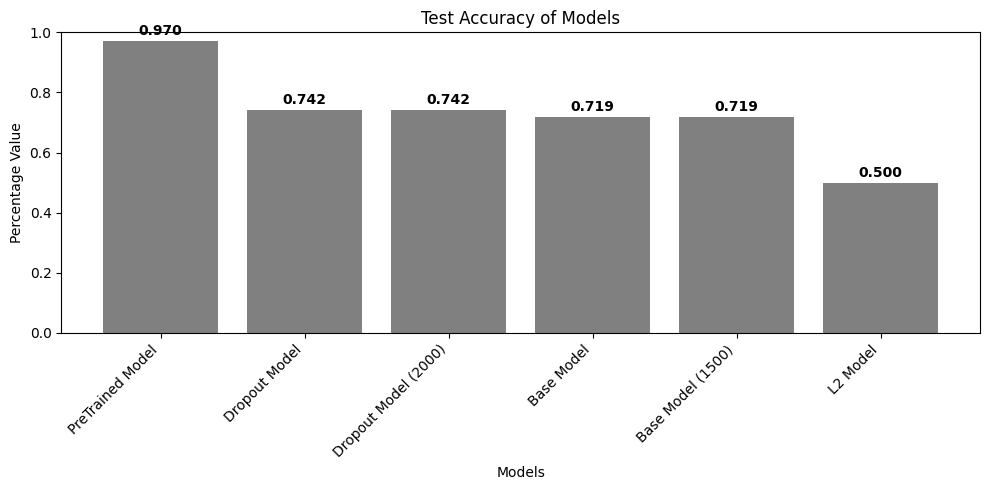

In [71]:
# Summary
test_accuracies = [
    pretrained_model_test_acc, model_d_test_acc, model_d_3_test_acc, model_base_test_acc,
    model_base_2_test_acc, model_L2_test_acc
]

model_names = ["PreTrained Model", "Dropout Model", "Dropout Model (2000)",
   "Base Model", "Base Model (1500)", "L2 Model"
]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(model_names, test_accuracies, color='grey')
plt.xlabel("Models")
plt.ylabel("Percentage Value")
plt.title("Test Accuracy of Models")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # accuracy is between 0 and 1
for i, v in enumerate(test_accuracies):
    plt.text(i, v + 0.02, f"{v:.3f}", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()
